# 1. LOAD DATA

In [1]:
import pandas as pd

# Used clean kaggle dataset
netflix_df = pd.read_csv('01 - Kaggle - Netflix_Engagement_Report_2023.csv')

print(netflix_df.shape)

netflix_df.head()

(18214, 4)


,Title,Available Globally,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,3/23/2023,812100000
1,Ginny & Georgia: Season 2,Yes,1/5/2023,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,622800000
3,Wednesday: Season 1,Yes,11/23/2022,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,503000000


# 2. EDA - RAW DATA


## 2A. YDATA PROFILING (Pandas-Profiling)

**Low Code EDA REPORT**

**DOCS URL:** https://docs.profiling.ydata.ai/latest/getting-started/quickstart/



### Data Dictionary for the Netflix Engagement Report 2023 Dataset

| Column Name         | Data Type | Description                                                       |
|---------------------|-----------|-------------------------------------------------------------------|
| Title               | object    | The name of the movie or TV show.                                 |
| Available Globally  | object    | Indicates if the title is available for streaming worldwide (Yes/No). |
| Release Date        | datetime  | The release date of the title. Note: Many entries are missing.    |
| Hours Viewed        | int64     | The total hours that the title was viewed.                        |

### Notes:
- The `Release Date` column contains missing values for a significant portion of the dataset. Only 4,855 out of 18,214 entries have non-null release dates.
- `Hours Viewed` represents the aggregate viewership, reflecting the popularity and engagement of each title.
- The dataset provides insights into global availability, indicating Netflix's distribution strategy.
- This dataset allows for analysis of content trends over time, especially with the inclusion of `Release Date` and `Hours Viewed`.


In [2]:
#CHeck info of table
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               18214 non-null  object
 1   Available Globally  18214 non-null  object
 2   Release Date        4855 non-null   object
 3   Hours Viewed        18214 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.3+ KB


In [3]:
#Convert Release Date to date time 
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'])

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               18214 non-null  object        
 1   Available Globally  18214 non-null  object        
 2   Release Date        4855 non-null   datetime64[ns]
 3   Hours Viewed        18214 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.3+ KB


In [5]:
from ydata_profiling import ProfileReport

#To generate the standard profiling report
profile = ProfileReport(netflix_df, title="Pandas Profiling Report - Netflix_Raw")

#Save report as html
#profile.to_file("03 - EDA - Pandas_Profiling_Report - Netflix_Raw.html")

#Display report in NOTEBOOK
#profile.to_notebook_iframe()

## 2B. MANUAL EDA - HIGH LEVEL


Here are the visual insights from the Exploratory Data Analysis (EDA) of the Netflix Engagement Report for 2023:

- **Distribution of Global Availability**: The first bar chart reveals a significant difference in the number of titles available globally versus those not available globally. With 4,514 (25%) titles available globally, there's a larger proportion, 13,700 (75%) titles, that are not available for streaming worldwide.

- **Viewership Distribution**: The histogram, using a logarithmic scale due to the wide range of viewership hours, showcases the distribution of "Hours Viewed" across titles. Most titles have relatively low viewership hours, with a few exceptions reaching extremely high viewership, indicating a long-tail distribution where a small number of titles capture the majority of viewing hours.

- **Distribution of Release Years for Netflix Titles**: The bar chart shows annual title releases from 2010 to 2023, revealing a steady increase that peaks in 2022. Data for 2023 only covers January to June.

These visuals provide a high-level overview of the Netflix content landscape in terms of availability, viewership, and release timing, highlighting trends and patterns that can inform deeper analyses or strategic decisions.


In [6]:
netflix_data = netflix_df.copy()

# Analyzing the distribution of global availability
global_availability_counts = netflix_data['Available Globally'].value_counts()

# Analyzing the distribution of Hours Viewed
hours_viewed_summary = netflix_data['Hours Viewed'].describe()

# Preparing data for release date analysis - we need to convert Release Date to datetime and extract year for those with non-null values
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')
netflix_data['Release Year'] = netflix_data['Release Date'].dt.year

release_year_counts = netflix_data['Release Year'].value_counts().sort_index()

global_availability_counts, hours_viewed_summary, release_year_counts


(Available Globally
 No     13700
 Yes     4514
 Name: count, dtype: int64,
 count    1.821400e+04
 mean     5.130954e+06
 std      1.871767e+07
 min      1.000000e+05
 25%      2.000000e+05
 50%      7.000000e+05
 75%      3.400000e+06
 max      8.121000e+08
 Name: Hours Viewed, dtype: float64,
 Release Year
 2010.0      8
 2011.0      3
 2012.0      1
 2013.0     12
 2014.0     28
 2015.0     79
 2016.0    192
 2017.0    361
 2018.0    595
 2019.0    698
 2020.0    779
 2021.0    814
 2022.0    956
 2023.0    329
 Name: count, dtype: int64)

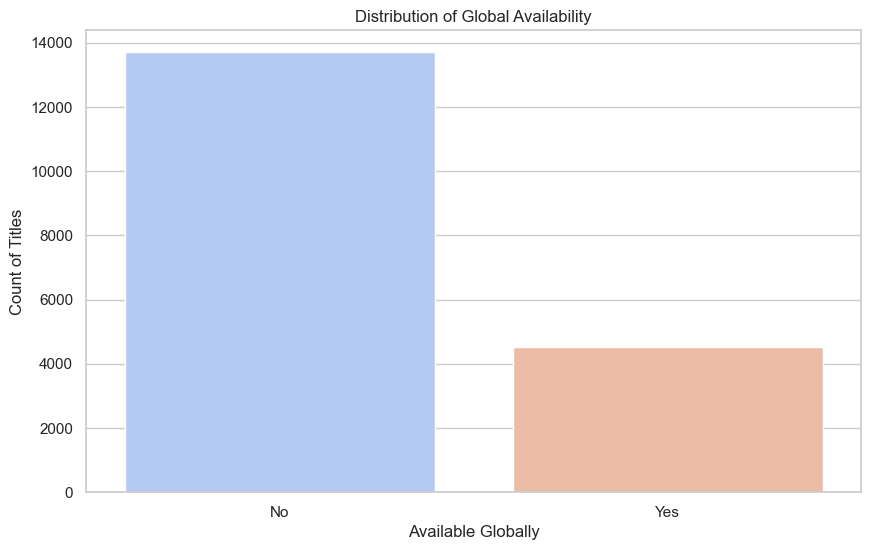

C:\Users\PhillipRashaad\.conda\envs\netflix_proj_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


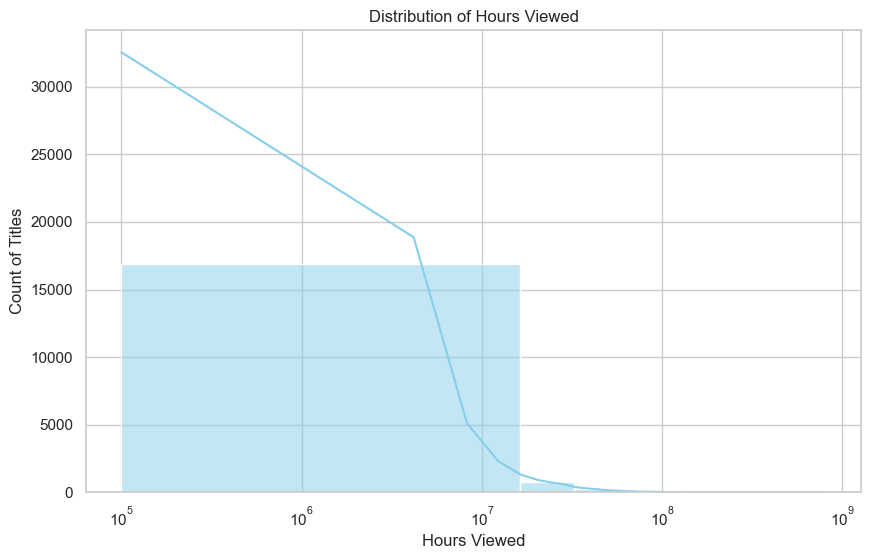

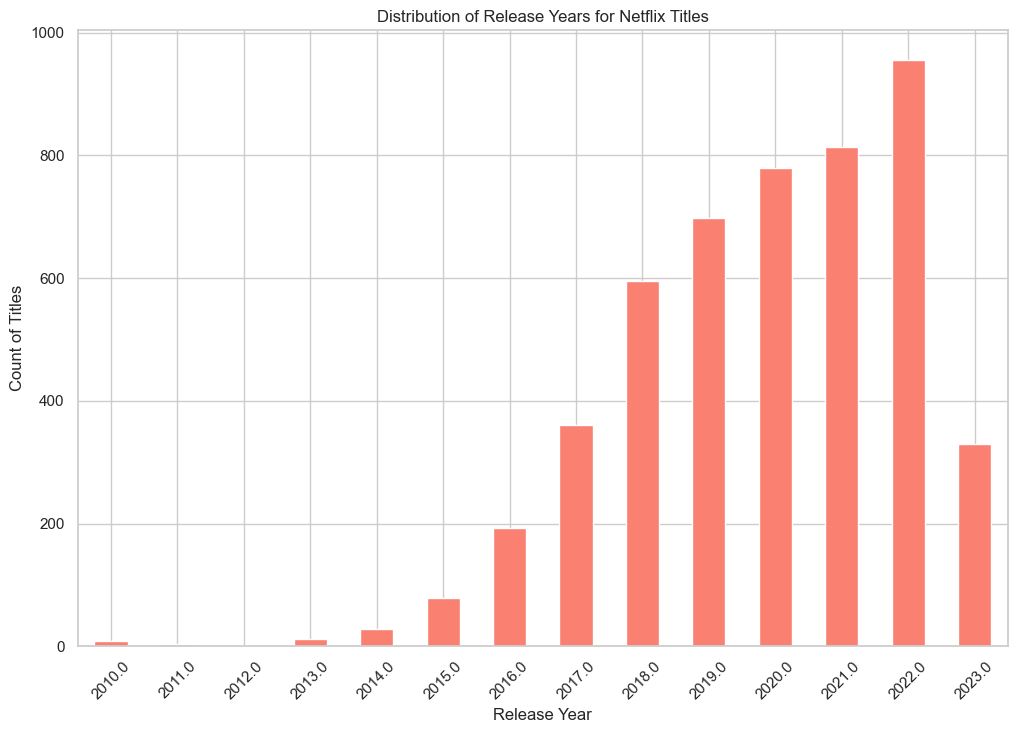

In [8]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Distribution of Global Availability
plt.figure(figsize=(10, 6))
sns.barplot(x=global_availability_counts.index, y=global_availability_counts.values, palette="coolwarm")
plt.title('Distribution of Global Availability')
plt.xlabel('Available Globally')
plt.ylabel('Count of Titles')
plt.show()

# Viewership Distribution
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['Hours Viewed'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Hours Viewed')
plt.xlabel('Hours Viewed')
plt.ylabel('Count of Titles')
plt.xscale('log')  # Using logarithmic scale due to wide distribution
plt.show()

# Release Year Distribution
plt.figure(figsize=(12, 8))
release_year_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Release Years for Netflix Titles')
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45)
plt.show()


# 3. Data Cleaning and Preprocessing

## 3A. FUNCTIONS - Webscrape Wikipedia Data 

In [9]:
#!pip install requests beautifulsoup4


In [10]:
#FUNCTION 1:
#Function to scrape tables from URL
import requests
from bs4 import BeautifulSoup

def scrape_tables_from_url(url, element='table'):
    """
    Scrapes all <table> elements from the given URL and stores them in a list.

    Parameters:
    - url (str): The URL to scrape tables from.

    Returns:
    - list: A list of BeautifulSoup objects representing each table found.
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Check for successful response
    if response.status_code != 200:
        return f"Failed to retrieve content from {url}, status code: {response.status_code}"

    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all <table> elements in the HTML
    tables = soup.find_all(element)

    # Initialize a list to store the tables for later review
    table_list = []

    # Iterate over each table and append it to the table_list
    for table in tables:
        table_list.append(table)

    # Optionally, print the number of tables collected
    print(f'Collected {len(table_list)} tables.')

    return table_list




In [11]:
#FUNCTION 2:
#Function to convert HTML table to dataframe

import pandas as pd
from bs4 import BeautifulSoup

def html_table_to_dataframe(html):
    #Convert to string
    html = str(html)

    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table', class_='wikitable sortable')

    if table is None:
        raise ValueError("Table not found in HTML content")

    # Attempting to find the first row of the table to extract headers
    first_row = table.find('tr')
    if first_row is None:
        raise ValueError("No rows found in the table")

    headers = [th.text.strip() for th in first_row.find_all('th')]
    
    data = []
    # Processing each row starting from the second one since we assume the first one contains headers
    for row in table.find_all('tr')[1:]:
        cells = row.find_all(['td', 'th'])  # This will include both td and th elements
        row_data = [cell.text.strip() for cell in cells if cell]
        if len(row_data) != len(headers):
            # Optionally handle the mismatch; for now, we'll just print a warning
            print(f"Warning: row with data {row_data} has a different number of columns than the headers")
        else:
            data.append(row_data)
    
    df = pd.DataFrame(data, columns=headers)
    return df


In [12]:
#FUNCTION 3:
#Function pipeline webscrape from url to list of dfs 
def webscrape_table_pipeline(wikipedia_url):
  #Webscrape URL for tables
  table_lst = scrape_tables_from_url(wikipedia_url)

  #empty list to capture table_dfs
  df_list = []

  #Loop though table list converting to df
  for table in table_lst:
    try:
      table_df = html_table_to_dataframe(table)
      print(table_df.shape, '\n\n')
      df_list.append(table_df)
    except:
      pass

  return df_list


In [13]:
#FUNCTION 4:
#Function that formats varying dfs into one formatted df
import numpy as np
import pandas as pd

def format_netflix_dfs(netflix_orig_df_list):
    """
    Formats a list of Netflix DataFrames to ensure they all contain 'Title', 'Genre', and 'Premiere' columns.
    
    Parameters:
    - netflix_orig_df_list (list of pd.DataFrame): The list of DataFrames to format.
    
    Returns:
    - list: A list of formatted DataFrames with the specified columns.
    """
    format_netflix_df_list = []
    
    # Loop through df list pulling needed titles
    for df in netflix_orig_df_list:
        try:
            format_netflix_df_list.append(df[['Title', 'Genre', 'Premiere']])
        except KeyError as e:
            missing_column = str(e).split("'")[1]  # Extract the missing column name from the error message
            print(f"Adding {missing_column} to dataframe")
            df[missing_column] = np.nan
            format_netflix_df_list.append(df[['Title', 'Genre', 'Premiere']])
    
    print('TOTAL DATAFRAMES: ',len(format_netflix_df_list))

    #Concat into 1 df
    final_format_df = pd.concat(format_netflix_df_list)
    
    return final_format_df


## 3B. Netflix Original Series (TV Shows & Cartoons)

**Orignal_Series_URL:** https://en.wikipedia.org/wiki/List_of_Netflix_original_programming

In [14]:
#Add url to variable
wiki_series_url = 'https://en.wikipedia.org/wiki/List_of_Netflix_original_programming'

wiki_series_url

'https://en.wikipedia.org/wiki/List_of_Netflix_original_programming'

In [15]:
#Use function to webscrape series tables
netflix_series_df_list = webscrape_table_pipeline(wiki_series_url)

print(len(netflix_series_df_list))

netflix_series_df_list[0]

Collected 93 tables.
(24, 6) 


(14, 6) 


(3, 6) 


(5, 7) 


(17, 7) 


(21, 6) 


(5, 6) 


(5, 6) 


(4, 6) 


(11, 6) 


(6, 6) 


(4, 6) 


(12, 6) 


(3, 6) 


(6, 6) 


(7, 6) 


(17, 6) 


(5, 6) 


(9, 6) 


(11, 7) 


(39, 7) 


(44, 7) 


(8, 7) 


(9, 8) 


(1, 5) 


(1, 7) 


(5, 8) 


(8, 9) 


(2, 9) 


(41, 3) 


(10, 3) 


(3, 3) 


(12, 3) 


(13, 3) 


(3, 3) 


(3, 3) 


(3, 3) 


(12, 3) 


(4, 3) 


(14, 3) 


(5, 3) 


(3, 3) 


(25, 3) 


(4, 3) 


(5, 3) 


(3, 3) 


(10, 4) 


(18, 4) 


(11, 4) 


(5, 5) 


(4, 7) 


(46, 2) 


52


,Title,Genre,Premiere,Seasons,Runtime,Status
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025[1]
1,The Umbrella Academy,Superhero action,"February 15, 2019","3 seasons, 30 episodes",40–60 min,"Final season due to premiere on August 8, 2024..."
2,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025[1][5]
3,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed[6]
4,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,Season 4 due to premiere in 2024[7][8]
5,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025[1][9]
6,Blood & Water,Teen drama,"May 20, 2020","4 seasons, 25 episodes",42–53 min,Pending
7,Bridgerton,Historical romance,"December 25, 2020","2 seasons, 16 episodes",53–72 min,"Season 3 part 1 due to premiere on May 16, 202..."
8,Ginny & Georgia,Coming-of-age drama,"February 24, 2021","2 seasons, 20 episodes",52–62 min,Season 3 due to premiere in 2025[1] Renewed fo...
9,Sweet Tooth,Fantasy drama,"June 4, 2021","2 seasons, 16 episodes",37–57 min,Final season due to premiere in 2024[7][14]


In [16]:
#Show last df layout
netflix_series_df_list[51].head()

,Title,Genre
0,Agency[219],Drama
1,Arbor Hall[404],Teen mystery thriller
2,Astronaut Chicks[219],Comedy
3,Black Rabbit[405],Drama miniseries
4,Cashero[406],Korean language superhero drama


In [19]:
#Save Python list variable as pickle file to load into Python later
import pickle

with open('04 - netflix_series_df_list.pkl', 'wb') as f:
  pickle.dump(netflix_series_df_list, f)


In [20]:
#Use format function to merge varying dfs into one formatted df
series_format_df = format_netflix_dfs(netflix_series_df_list)

print(series_format_df.shape)

series_format_df.head()

Adding Genre to dataframe
Adding Genre to dataframe
Adding Genre to dataframe
Adding Premiere to dataframe
TOTAL DATAFRAMES:  52
(563, 3)


,Title,Genre,Premiere
0,Stranger Things,Science fiction horror,"July 15, 2016"
1,The Umbrella Academy,Superhero action,"February 15, 2019"
2,Virgin River,Romantic drama,"December 6, 2019"
3,The Witcher,Fantasy drama,"December 20, 2019"
4,Outer Banks,Coming-of-age drama,"April 15, 2020"


In [21]:
#Save to csv
series_format_df.to_csv('04 - FORMATTED - Series_Wiki_Netflix.csv', index=False )

In [22]:
#View table info
series_format_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 45
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     563 non-null    object
 1   Genre     485 non-null    object
 2   Premiere  517 non-null    object
dtypes: object(3)
memory usage: 17.6+ KB


## 3C. Netflix Original Films (Movies & Documentaries)

**Orignal_Series_URL:** https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2023)

In [23]:
#Add url to variable
wiki_film_url = 'https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2023)'

wiki_film_url

'https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2023)'

In [24]:
#Use function to webscrape series tables
netflix_film_df_list = webscrape_table_pipeline(wiki_film_url)

print(len(netflix_film_df_list))

netflix_film_df_list[0].head()

Collected 5 tables.
(153, 5) 


(49, 5) 


(11, 5) 


(11, 5) 


4


,Title,Genre,Premiere,Runtime,Language
0,The Pale Blue Eye,Historical thriller drama,"January 6, 2023",2 h 10 min,English
1,Noise,Drama,"January 11, 2023",1 h 45 min,Spanish
2,Dog Gone,Family drama,"January 13, 2023",1 h 35 min,English
3,Disconnect: The Wedding Planner,Romantic comedy,"January 13, 2023",1 h 47 min,English
4,Alkhallat+,Satirical thriller,"January 19, 2023",1 h 57 min,Arabic


In [25]:
#Save Python list variable as pickle file to load into Python later
import pickle

with open('05 - netflix_film_df_list.pkl', 'wb') as f:
  pickle.dump(netflix_film_df_list, f)


In [26]:
#Use format function to merge varying dfs into one formatted df
film_format_df = format_netflix_dfs(netflix_film_df_list)

print(film_format_df.shape)

film_format_df.head()

TOTAL DATAFRAMES:  4
(224, 3)


,Title,Genre,Premiere
0,The Pale Blue Eye,Historical thriller drama,"January 6, 2023"
1,Noise,Drama,"January 11, 2023"
2,Dog Gone,Family drama,"January 13, 2023"
3,Disconnect: The Wedding Planner,Romantic comedy,"January 13, 2023"
4,Alkhallat+,Satirical thriller,"January 19, 2023"


In [27]:
#Save to csv
film_format_df.to_csv('05 - FORMATTED - Film_Wiki_Netflix.csv', index=False )

In [28]:
film_format_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     224 non-null    object
 1   Genre     224 non-null    object
 2   Premiere  224 non-null    object
dtypes: object(3)
memory usage: 7.0+ KB


## 3D. MERGE FILM & SERIES FORMATTED DATAFRAMES

In [29]:
#merge dataframes Series and Film

import pandas as pd
merged_df = pd.concat([series_format_df, film_format_df])

print(merged_df.shape)

#Save to csv
merged_df.to_csv("06 - MERGED - Netflix_Orig_Film_Series.csv", index=False)

merged_df.head()

(787, 3)


,Title,Genre,Premiere
0,Stranger Things,Science fiction horror,"July 15, 2016"
1,The Umbrella Academy,Superhero action,"February 15, 2019"
2,Virgin River,Romantic drama,"December 6, 2019"
3,The Witcher,Fantasy drama,"December 20, 2019"
4,Outer Banks,Coming-of-age drama,"April 15, 2020"


In [30]:
#View merged data info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     787 non-null    object
 1   Genre     709 non-null    object
 2   Premiere  741 non-null    object
dtypes: object(3)
memory usage: 24.6+ KB


In [31]:
#View merged data Nan count
merged_df.isna().sum()

Title        0
Genre       78
Premiere    46
dtype: int64